# Exploratory Data Analysis
Reference: https://www.kaggle.com/kabure/extensive-eda-and-modeling-xgb-hyperopt/notebook


- The data is broken into two files identity and transaction, which are joined by TransactionID.
    - Note: Not all transactions have corresponding identity information.
    
- The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Read Dataset

In [2]:
df_id = pd.read_csv('./datasets/train_identity.csv')

In [3]:
df_train = pd.read_csv('./datasets/train_transaction.csv')

In [5]:
df_id.shape

(144233, 41)

In [6]:
df_train.shape

(590540, 394)

In [8]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
df_train.iloc[:5, 5:17]

,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain
0,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN
1,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN
2,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN
3,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN
4,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN


In [12]:
df_train.iloc[:5, 18:38]

,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN
3,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_train.iloc[:5, 39:59]

,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4
0,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0
1,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F,F,F,F,1.0,1.0,1.0,1.0
3,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_train.iloc[:5, 60:80]

,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_train.iloc[:5, 80:]

,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Inspect train_identity

In [25]:
df_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [28]:
df_id.iloc[:5, :15]

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0


In [32]:
df_id.iloc[:5, 16:30]

,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29
0,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound
1,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound
2,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found
3,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound
4,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found


In [36]:
df_id.iloc[:5, 31:41]

,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


# Check The Null cell

In [9]:
df_train['isFraud'].isnull().any()

False

In [11]:
nan_train = df_train.isnull().any()

In [13]:
nan_train.head(10)

TransactionID     False
isFraud           False
TransactionDT     False
TransactionAmt    False
ProductCD         False
card1             False
card2              True
card3              True
card4              True
card5              True
dtype: bool

In [14]:
nan_train.tail(10)

V330    True
V331    True
V332    True
V333    True
V334    True
V335    True
V336    True
V337    True
V338    True
V339    True
dtype: bool

# Check Class Imbalance

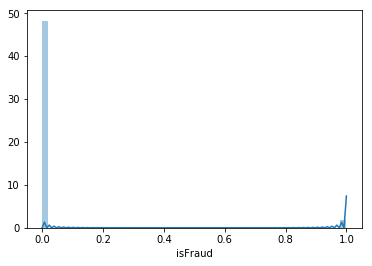

In [15]:
sns.distplot(df_train['isFraud'])

In [23]:
df_train.groupby('isFraud').count().iloc[:, 0]

isFraud
0    569877
1     20663
Name: TransactionID, dtype: int64

### Observation
The fraud/non-fraud ratio = 20,663 / 569,877 = 0.0362 = 3.62%.

The fraud ratio is pretty high.

# TransactionAmt of train dataset

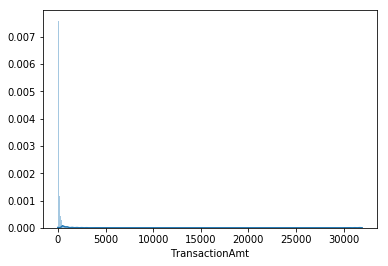

In [25]:
sns.distplot(df_train['TransactionAmt'], bins=500)

### Observation:
It's interesting that the TransactionAmt could greater than 1,000.

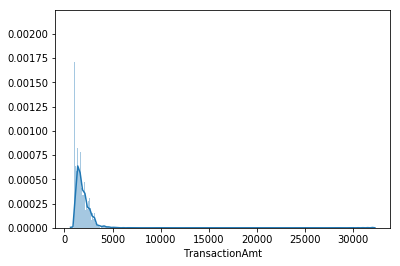

In [27]:
sns.distplot(df_train[df_train['TransactionAmt']>1000]['TransactionAmt'], bins=500)

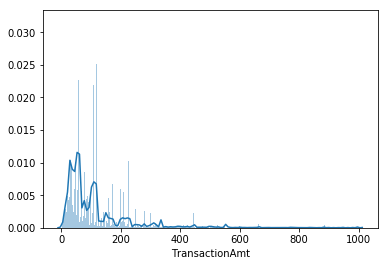

In [28]:
sns.distplot(df_train[df_train['TransactionAmt']<1000]['TransactionAmt'], bins=500)

Text(0.5, 1.0, 'Log Plot')

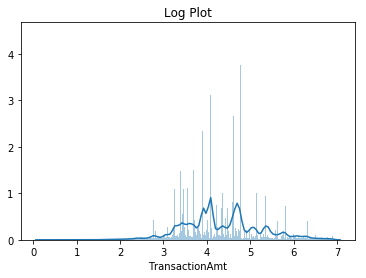

In [31]:
ax = sns.distplot(np.log1p(df_train[df_train['TransactionAmt']<1000]['TransactionAmt']), bins=500)
ax.set_title('Log Plot')

# Pair Plot of isFraud and TransactionAmt

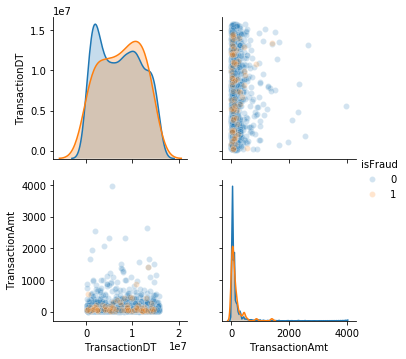

In [42]:
sns.pairplot(data=df_train.sample(2000, random_state=0),
            hue='isFraud',
            vars=['TransactionDT', 'TransactionAmt'],
            plot_kws={'alpha':0.2})

# Check the distribution of TransactionDT

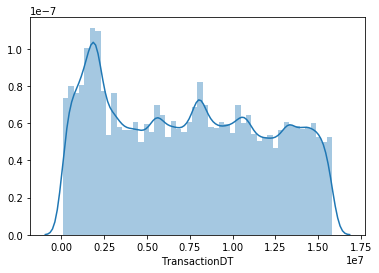

In [32]:
sns.distplot(df_train['TransactionDT'])

Text(0.5, 1.0, 'Log of TransactionDT')

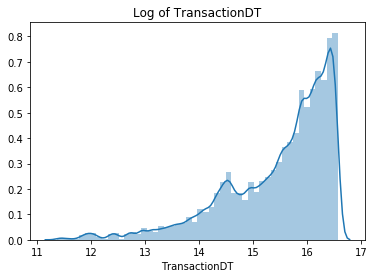

In [35]:
ax = sns.distplot(np.log1p(df_train['TransactionDT']))
ax.set_title('Log of TransactionDT')

# Product Feature

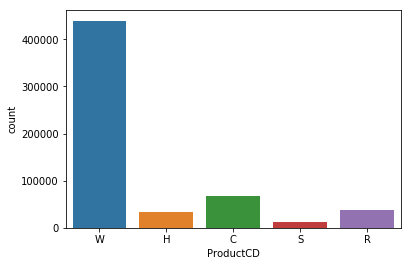

In [44]:
sns.countplot(data=df_train,
             x='ProductCD')

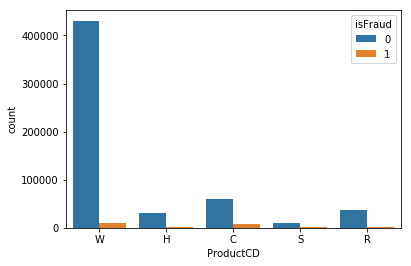

In [45]:
sns.countplot(data=df_train,
             x='ProductCD',
             hue='isFraud')

# Observation
W has lower fraud rate

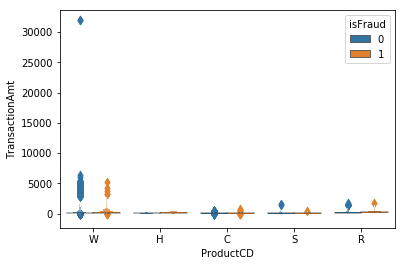

In [53]:
sns.boxenplot(data=df_train,
           x='ProductCD',
           y='TransactionAmt',
           hue='isFraud')

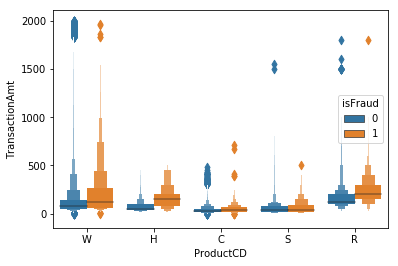

In [52]:
sns.boxenplot(data=df_train[df_train['TransactionAmt']<2000],
           x='ProductCD',
           y='TransactionAmt',
           hue='isFraud')

### Observation
The W, H, and R have higher fraud value.

# Card Features

In [62]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
df_train.iloc[:5, 5:11]

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


### Count the number of Missing Cells

In [68]:
df_train[['card1', 'card2', 'card3','card4', 'card5', 'card6']].isnull().sum()

card1       0
card2    8933
card3    1565
card4    1577
card5    4259
card6    1571
dtype: int64

# Count Unique Values

In [4]:
df_train[['card1', 'card2', 'card3','card4', 'card5', 'card6']].nunique()

card1    13553
card2      500
card3      114
card4        4
card5      119
card6        4
dtype: int64

# Plot distributions of card 1, 2, 3, and 5

Text(0.5, 1.0, 'Card1 Distribution')

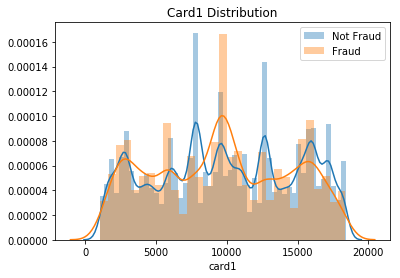

In [12]:
index='card1'
sns.distplot(df_train[df_train['isFraud']==0][index])
ax = sns.distplot(df_train[df_train['isFraud']==1][index])
ax.legend(['Not Fraud', 'Fraud'])
ax.set_title('Card1 Distribution')

Text(0.5, 1.0, 'card2 Distribution')

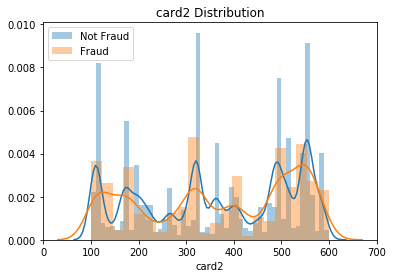

In [14]:
index='card2'
sns.distplot(df_train[df_train['isFraud']==0][index].dropna())
ax = sns.distplot(df_train[df_train['isFraud']==1][index].dropna())
ax.legend(['Not Fraud', 'Fraud'])
ax.set_title('{} Distribution'.format(index))

Text(0.5, 1.0, 'card3 Distribution')

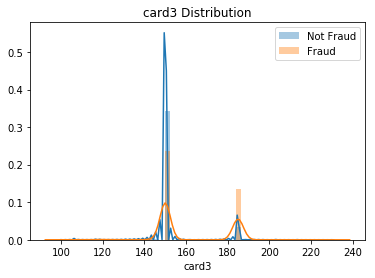

In [15]:
index='card3'
sns.distplot(df_train[df_train['isFraud']==0][index].dropna())
ax = sns.distplot(df_train[df_train['isFraud']==1][index].dropna())
ax.legend(['Not Fraud', 'Fraud'])
ax.set_title('{} Distribution'.format(index))

Text(0.5, 1.0, 'card3 Distribution')

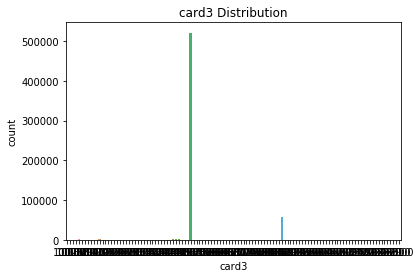

In [19]:
index='card3'
ax =sns.countplot(data=df_train, x=index)
ax.set_title('{} Distribution'.format(index))

Text(0.5, 1.0, 'card5 Distribution')

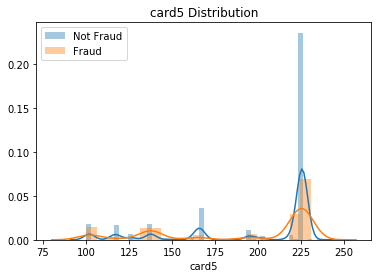

In [18]:
index='card5'
sns.distplot(df_train[df_train['isFraud']==0][index].dropna())
ax = sns.distplot(df_train[df_train['isFraud']==1][index].dropna())
ax.legend(['Not Fraud', 'Fraud'])
ax.set_title('{} Distribution'.format(index))

# Plot Card 4

Text(0.5, 1.0, 'card4')

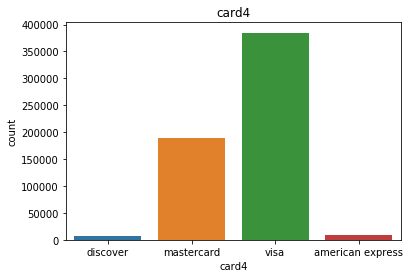

In [21]:
index='card4'
ax = sns.countplot(df_train[index])

ax.set_title('{}'.format(index))

In [26]:
index='card4'


In [66]:
pd.crosstab(df_train[index],
            df_train['isFraud'])

isFraud,0,1
card4,,
american express,8089,239
discover,6137,514
mastercard,182721,6496
visa,371394,13373


In [43]:
tmp = pd.crosstab(df_train[index], 
                  df_train['isFraud'],
                 normalize='index')*100

In [44]:
tmp.shape

(4, 2)

In [45]:
tmp

isFraud,0,1
card4,,
american express,97.130163,2.869837
discover,92.271839,7.728161
mastercard,96.566905,3.433095
visa,96.524390,3.475610


In [46]:
tmp = tmp.rename(columns={0:'NoFraud', 1:'Fraud'})

In [53]:
tmp

isFraud,NoFraud,Fraud
card4,,
american express,97.130163,2.869837
discover,92.271839,7.728161
mastercard,96.566905,3.433095
visa,96.524390,3.475610


In [60]:
# ax = sns.pointplot(data=tmp, x='card4', y='Fraud')


Text(0.5, 1.0, 'card4')

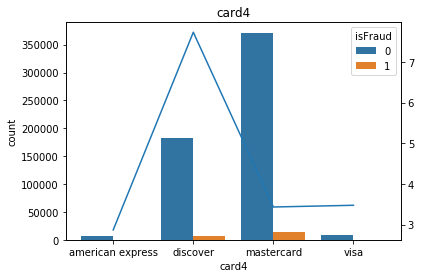

In [64]:
ax = sns.countplot(data=df_train, x=index, hue='isFraud')
ax.twinx().plot(tmp['Fraud'])

ax.set_title('{}'.format(index))

# Observation
The discover has the highest fraud rate.

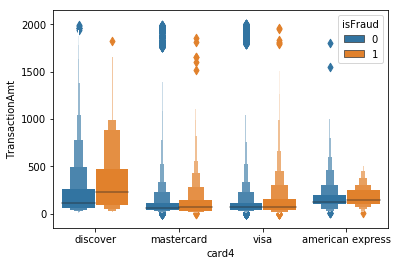

In [69]:
sns.boxenplot(x='card4', 
              y='TransactionAmt', 
              hue='isFraud',
             data=df_train[df_train['TransactionAmt'] <= 2000])

# Plot Card 6

In [91]:
tmp = pd.crosstab(df_train['card6'],
                 df_train['isFraud'])

In [92]:
tmp = pd.crosstab(df_train['card6'],
                 df_train['isFraud'],
                 normalize='index') * 100

tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

In [93]:
tmp

isFraud,NoFraud,Fraud
card6,,
charge card,100.000000,0.000000
credit,93.321520,6.678480
debit,97.573749,2.426251
debit or credit,100.000000,0.000000


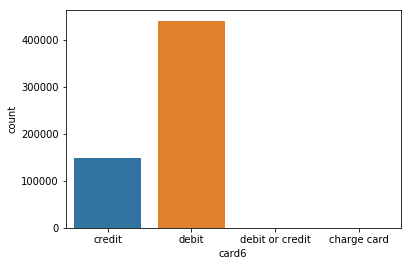

In [76]:
index='card6'
sns.countplot(x=index, data=df_train)

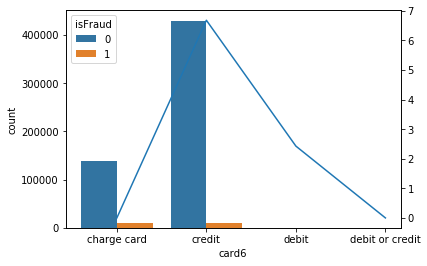

In [95]:
ax = sns.countplot(x=index,
             hue='isFraud',
             data=df_train)

ax.twinx().plot(tmp['Fraud'])

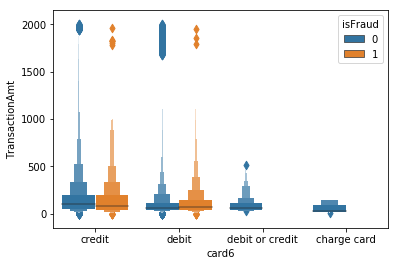

In [98]:
sns.boxenplot(x=index,
              y='TransactionAmt',
             hue='isFraud',
             data=df_train[df_train['TransactionAmt']<2000])

# Exploring M1-M9 Features

In [108]:
print(df_train.columns[:60])

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5'],
      dtype='object')


In [130]:
indices = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

for index in indices:
    df_train[index] = df_train[index].fillna('Missing')

In [88]:
tmp = pd.crosstab(df_train[index],
                 df_train['isFraud'], normalize=True)*100

# tmp.reset_index()
tmp.rename(columns={0: 'NoFraud', 1:'Fraud'}, inplace=True)
print(type(tmp))
print(tmp.columns)


<class 'pandas.core.frame.DataFrame'>
Index(['NoFraud', 'Fraud'], dtype='object', name='isFraud')


In [107]:
tmp

isFraud,NoFraud,Fraud
M1,,
F,0.004233,0.000000
Missing,43.482067,2.425069
T,53.014698,1.073932


In [110]:
tmp.iloc[:, 1]

M1
F          0.000000
Missing    2.425069
T          1.073932
Name: Fraud, dtype: float64

Text(0, 0.5, 'Fraud Ratio %')

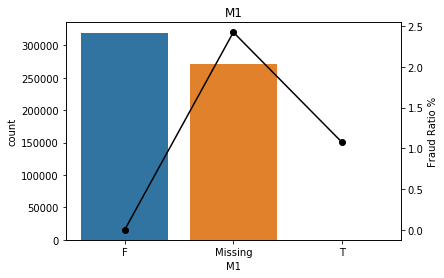

In [123]:
ax = sns.countplot(data=df_train,
                     x=index)
ax.set_title(index)

decorators = {'color': 'black',
             'marker': 'o'}

ax_twin = ax.twinx()
# ax_twin.plot(tmp['Fraud'], color='black', marker='o')
ax_twin.plot(tmp['Fraud'], **decorators)

ax_twin.set_ylabel('Fraud Ratio %')

In [32]:
def plot_counts_and_ratio(df, index_x, index_y, ax=None):
    ax = sns.countplot(data=df,
                         x=index_x,
                         ax=ax)
    
#     ax.set_title(index)
    
    # create twin axis
    twinx = ax.twinx()
    
    # create corss tab of ratio
    tmp = pd.crosstab(df[index_x], 
                      df[index_y],
                     normalize='index') * 100
    
#     print(tmp)
    
    # define optional plotting decorators
    decorators = {'color': 'black',
                 'marker': 'o'}
    
    twinx.plot(tmp.iloc[:, 1], **decorators)
    
    twinx.set_ylabel('Fraud Ratio %')
    
    return ax

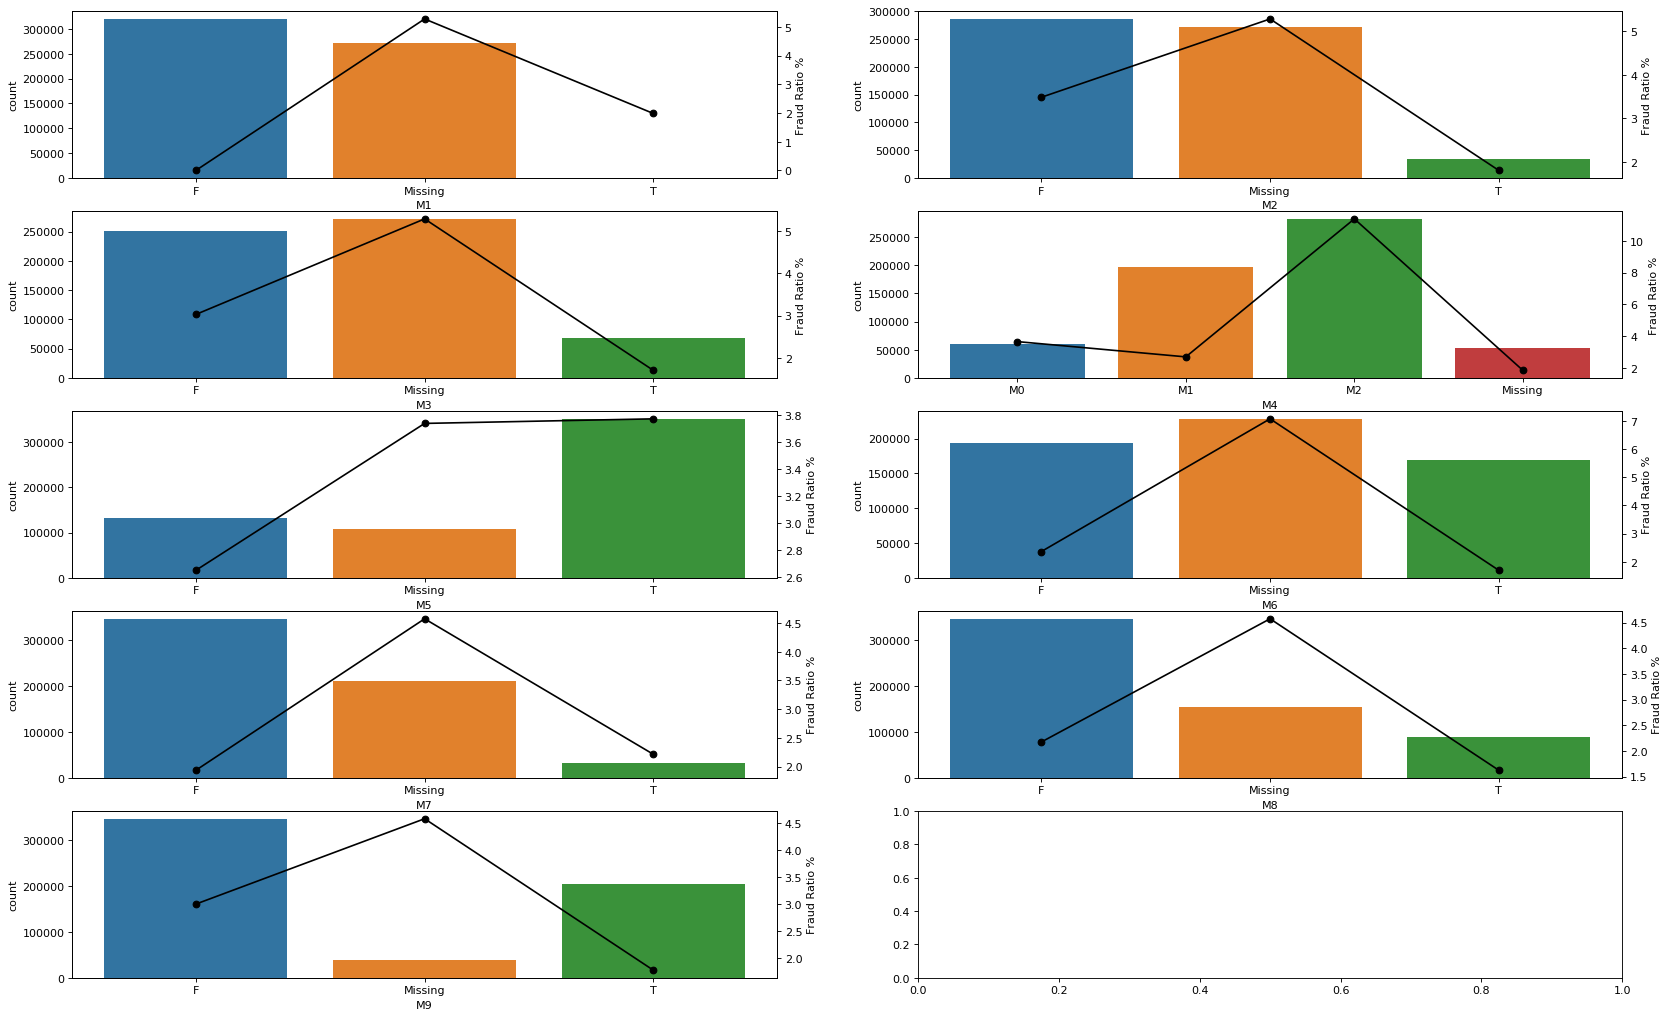

In [162]:
ncols = 2
nrows = (len(indices)+1)//ncols

fig, axs = plt.subplots(nrows, ncols,
                       figsize=(25, 16), dpi= 80, facecolor='w', edgecolor='k')

for fig_index, index in enumerate(indices):
    iCol = fig_index % ncols
    iRow = fig_index // ncols
    plot_counts_and_ratio(df_train, index, 'isFraud', ax=axs[iRow, iCol])

### Observation
Most features with missing value have highest fraud ratio except M4.

# Features addr1 and addr2

In [165]:
df_train[['addr1', 'addr2']].head()

,addr1,addr2
0,315.0,87.0
1,325.0,87.0
2,330.0,87.0
3,476.0,87.0
4,420.0,87.0


In [168]:
df_train[['addr1', 'addr2']].isnull().sum()

addr1    65706
addr2    65706
dtype: int64

In [ ]:
df_train[['addr1', 'addr2']] = df_train[['addr1', 'addr2']].fillna('Mi')

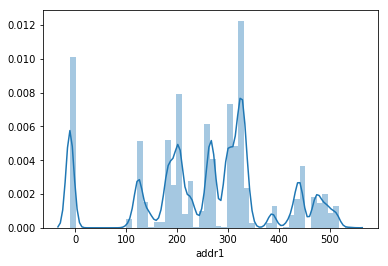

In [176]:
sns.distplot(df_train['addr1'].fillna(-10))


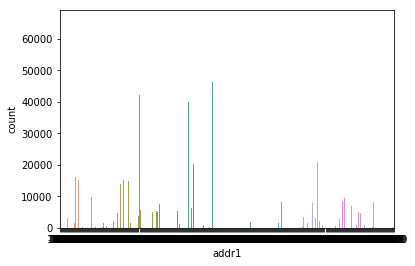

In [181]:
sns.countplot(df_train['addr1'].fillna(-10))

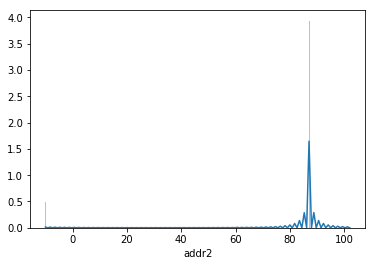

In [178]:
sns.distplot(df_train['addr2'].fillna(-10), bins=500)

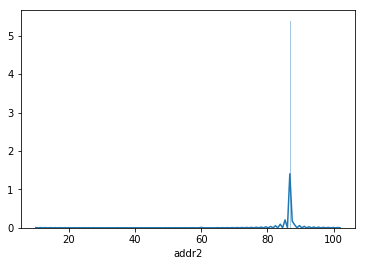

In [180]:
sns.distplot(df_train[df_train['addr2'].notnull()]['addr2'], bins=500)

# Check Email Domains

In [5]:
df_train[['P_emaildomain', 'R_emaildomain']].head()

,P_emaildomain,R_emaildomain
0,NaN,NaN
1,gmail.com,NaN
2,outlook.com,NaN
3,yahoo.com,NaN
4,gmail.com,NaN


In [6]:
df_train[['P_emaildomain', 'R_emaildomain']].isnull().sum()

P_emaildomain     94456
R_emaildomain    453249
dtype: int64

#### Check Domains when P_emaildomain is not null

In [10]:
df_train[df_train['P_emaildomain'].notnull()][['P_emaildomain', 'R_emaildomain']].head(10)

,P_emaildomain,R_emaildomain
1,gmail.com,NaN
2,outlook.com,NaN
3,yahoo.com,NaN
4,gmail.com,NaN
5,gmail.com,NaN
6,yahoo.com,NaN
7,mail.com,NaN
8,anonymous.com,NaN
9,yahoo.com,NaN
10,gmail.com,gmail.com


#### Observation
anonymous.com does not exist

#### Check Domains when R_emaildomain is not null

In [9]:
df_train[df_train['R_emaildomain'].notnull()][['P_emaildomain', 'R_emaildomain']].head(10)

,P_emaildomain,R_emaildomain
10,gmail.com,gmail.com
11,hotmail.com,hotmail.com
38,NaN,gmail.com
40,gmail.com,gmail.com
48,outlook.com,outlook.com
49,anonymous.com,anonymous.com
68,hotmail.com,hotmail.com
69,NaN,hotmail.com
72,outlook.com,outlook.com
74,gmail.com,gmail.com


### Filter common domains

In [23]:
domains = ['gmail.com', 'outlook.com', 'yahoo.com', 'hotmail.com', 'anonymous.com', pd.np.nan]
selected_features = ['P_emaildomain', 'R_emaildomain']

df_train[~df_train['P_emaildomain'].isin(domains)][selected_features].head(20)

,P_emaildomain,R_emaildomain
7,mail.com,NaN
12,verizon.net,NaN
13,aol.com,NaN
16,aol.com,NaN
26,me.com,NaN
80,comcast.net,NaN
82,optonline.net,NaN
92,cox.net,NaN
93,charter.net,charter.net
100,comcast.net,NaN


### Obervation
- me.com is Apple's product.
- comcast.net is the owner of NBC.

[Text(0, 0, 'gmail.com'),
 Text(0, 0, 'outlook.com'),
 Text(0, 0, 'yahoo.com'),
 Text(0, 0, 'mail.com'),
 Text(0, 0, 'anonymous.com'),
 Text(0, 0, 'hotmail.com'),
 Text(0, 0, 'verizon.net'),
 Text(0, 0, 'aol.com'),
 Text(0, 0, 'me.com'),
 Text(0, 0, 'comcast.net'),
 Text(0, 0, 'optonline.net'),
 Text(0, 0, 'cox.net'),
 Text(0, 0, 'charter.net'),
 Text(0, 0, 'rocketmail.com'),
 Text(0, 0, 'prodigy.net.mx'),
 Text(0, 0, 'embarqmail.com'),
 Text(0, 0, 'icloud.com'),
 Text(0, 0, 'live.com.mx'),
 Text(0, 0, 'gmail'),
 Text(0, 0, 'live.com'),
 Text(0, 0, 'att.net'),
 Text(0, 0, 'juno.com'),
 Text(0, 0, 'ymail.com'),
 Text(0, 0, 'sbcglobal.net'),
 Text(0, 0, 'bellsouth.net'),
 Text(0, 0, 'msn.com'),
 Text(0, 0, 'q.com'),
 Text(0, 0, 'yahoo.com.mx'),
 Text(0, 0, 'centurylink.net'),
 Text(0, 0, 'servicios-ta.com'),
 Text(0, 0, 'earthlink.net'),
 Text(0, 0, 'hotmail.es'),
 Text(0, 0, 'cfl.rr.com'),
 Text(0, 0, 'roadrunner.com'),
 Text(0, 0, 'netzero.net'),
 Text(0, 0, 'gmx.de'),
 Text(0, 0, 'sud

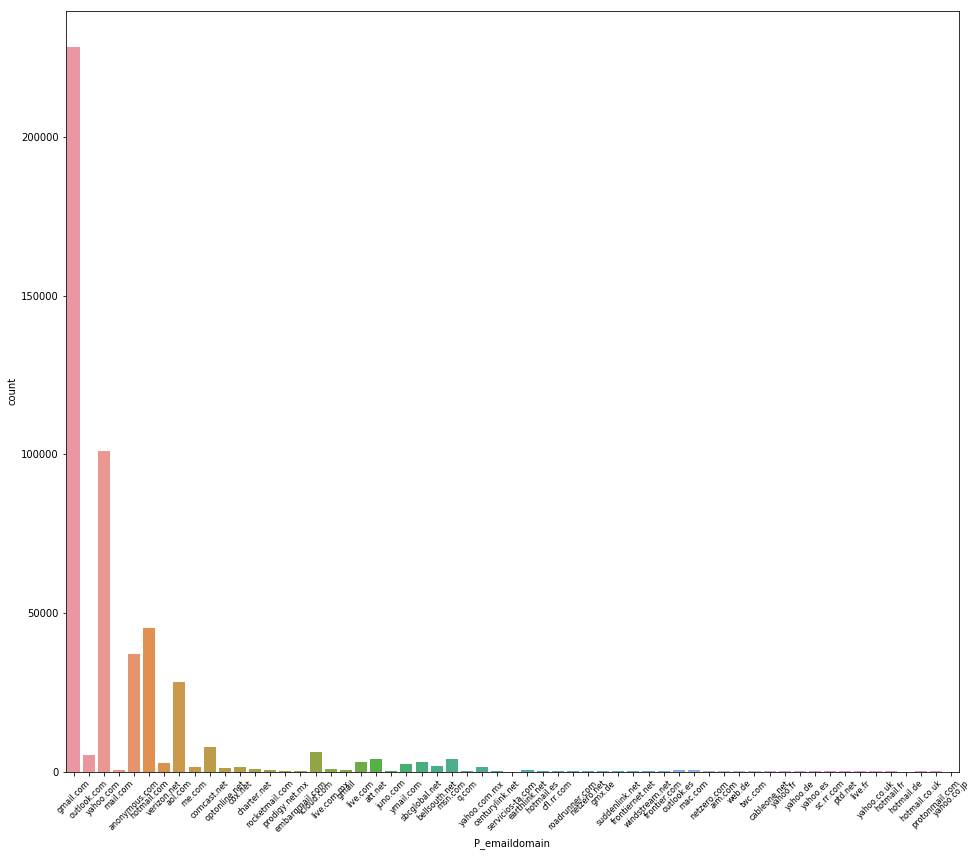

In [30]:
plt.figure(figsize=(16, 14))
ax = sns.countplot(df_train['P_emaildomain'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=8)

[Text(0, 0, 'gmail.com'),
 Text(0, 0, 'outlook.com'),
 Text(0, 0, 'yahoo.com'),
 Text(0, 0, 'mail.com'),
 Text(0, 0, 'anonymous.com'),
 Text(0, 0, 'hotmail.com'),
 Text(0, 0, 'verizon.net'),
 Text(0, 0, 'aol.com'),
 Text(0, 0, 'me.com'),
 Text(0, 0, 'comcast.net'),
 Text(0, 0, 'optonline.net'),
 Text(0, 0, 'cox.net'),
 Text(0, 0, 'charter.net'),
 Text(0, 0, 'rocketmail.com'),
 Text(0, 0, 'prodigy.net.mx'),
 Text(0, 0, 'embarqmail.com'),
 Text(0, 0, 'icloud.com'),
 Text(0, 0, 'live.com.mx'),
 Text(0, 0, 'gmail'),
 Text(0, 0, 'live.com'),
 Text(0, 0, 'att.net'),
 Text(0, 0, 'juno.com'),
 Text(0, 0, 'ymail.com'),
 Text(0, 0, 'sbcglobal.net'),
 Text(0, 0, 'bellsouth.net'),
 Text(0, 0, 'msn.com'),
 Text(0, 0, 'q.com'),
 Text(0, 0, 'yahoo.com.mx'),
 Text(0, 0, 'centurylink.net'),
 Text(0, 0, 'servicios-ta.com'),
 Text(0, 0, 'earthlink.net'),
 Text(0, 0, 'hotmail.es'),
 Text(0, 0, 'cfl.rr.com'),
 Text(0, 0, 'roadrunner.com'),
 Text(0, 0, 'netzero.net'),
 Text(0, 0, 'gmx.de'),
 Text(0, 0, 'sud

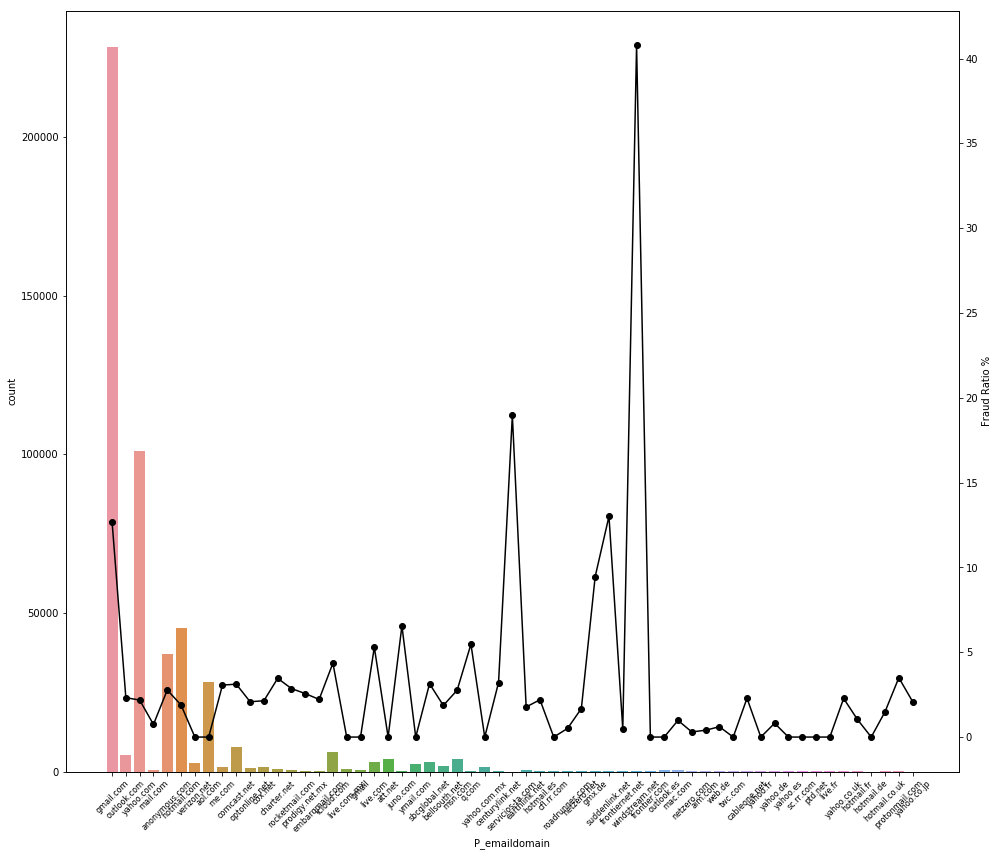

In [35]:
plt.figure(figsize=(16, 14))
ax = plot_counts_and_ratio(df_train, 'P_emaildomain', 'isFraud')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=8)